In [1]:
# Import necessary packages
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [2]:
# Initialize instance of H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_121"; OpenJDK Runtime Environment (Zulu 8.20.0.5-linux64) (build 1.8.0_121-b15); OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-linux64) (build 25.121-b15, mixed mode)
  Starting server from /home/niranjan/anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpvhmg_lbu
  JVM stdout: /tmp/tmpvhmg_lbu/h2o_niranjan_started_from_python.out
  JVM stderr: /tmp/tmpvhmg_lbu/h2o_niranjan_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,15 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.5
H2O cluster version age:,1 month and 10 days
H2O cluster name:,H2O_from_python_niranjan_djg29g
H2O cluster total nodes:,1
H2O cluster free memory:,3.450 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [3]:
# If possible download from the s3 link and change the path to the dataset
path = "http://h2o-public-test-data.s3.amazonaws.com/bigdata/laptop/lending-club/LoanStats3a.csv"

In [4]:
# Specify some column types to "String" that we want to munge later
types = {"int_rate":"string", "revol_util":"string", "emp_length":"string", "verification_status":"string"}

In [5]:
# Task 1: Import the file and look at the frame
loan_stats = h2o.import_file(path=path, col_types= types)
loan_stats.describe()

Parse progress: |█████████████████████████████████████████████████████████| 100%
Rows:42538
Cols:52




,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
type,int,int,int,int,real,enum,string,real,enum,enum,enum,string,enum,real,string,time,enum,enum,string,enum,enum,enum,enum,enum,real,int,time,int,enum,enum,int,int,int,string,int,enum,real,real,real,real,real,real,real,real,real,time,real,time,time,int,enum,int
mins,54734.0,70473.0,500.0,500.0,0.0,,NaN,15.67,,,,NaN,,1896.0,NaN,1180656000000.0,,,NaN,,,,,,0.0,0.0,-757382400000.0,0.0,,,1.0,0.0,0.0,NaN,1.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1196467200000.0,0.0,1196467200000.0,1177977600000.0,0.0,,1.0
mean,664579.8523098631,825702.5511696248,11089.722581403541,10821.585752909365,10139.830601160364,,NaN,322.62561866698,,,,NaN,,69136.55642025825,NaN,1285641609930.648,,,NaN,,,,,,13.373043140942759,0.15244906601420968,854295612817.0143,1.081423798993082,,,9.343951442149336,0.05815649555356893,14297.86091454095,NaN,22.124405966216546,,329.41112354531555,327.0899654402251,11651.753137029318,10948.580165745856,9368.080581873744,2209.049112025393,1.4587326863798291,73.16471900701596,9.076818272012225,1360320371318.195,2552.6072568473037,1381323445229.343,1385971917105.173,0.0,,1.0
maxs,1077501.0,1314167.0,35000.0,35000.0,35000.0,,NaN,1305.19,,,,NaN,,6000000.0,NaN,1322697600000.0,,,NaN,,,,,,29.99,13.0,1225497600000.0,33.0,,,47.0,5.0,1207359.0,NaN,90.0,,17749.51,17749.51,56809.05162878322,56475.05,35000.03,21809.05,208.819529958391,29623.35,7002.19,1433116800000.0,36115.2,1438387200000.0,1435708800000.0,0.0,,1.0
sigma,219302.21931883905,279540.9056350489,7410.938390546601,7146.914675006229,7131.68644867631,,NaN,208.9280690000803,,,,NaN,,64096.34971887441,NaN,31759283733.073658,,,NaN,,,,,,6.72631490173,0.5124064850165571,216068688522.35654,1.5274548353027584,,,4.49627387569111,0.2457131406505005,22018.441009683225,NaN,11.592811337332776,,1417.5456861321047,1409.6137334926425,8555.469899333262,8486.9803940282,6777.119818605452,2502.528240924457,7.572756175925984,612.2601853504029,149.08682302572697,47801906399.7347,4380.384766172411,69074077358.57875,49253773579.30009,0.0,,0.0
zeros,0,0,0,0,233,,0,0,,,,0,,0,0,0,,,0,,,,,,206,37771,4,19657,,,0,40130,1119,0,0,,38972,38972,26,304,86,83,40214,38357,39033,0,95,0,0,42390,,0
missing,3,3,3,3,3,3,3,3,3,3,3,3,3,7,3,3,3,3,3,3,3,3,3,3,3,32,32,32,3,3,32,32,3,3,32,3,3,3,3,3,3,3,3,3,3,86,3,36281,7,148,3,3
0,1077501.0,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,,10+ years,RENT,24000.0,VERIFIED - income,2011-12-01 00:00:00,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01 00:00:00,1.0,,,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5861.071414249,5831.78,5000.0,861.07,0.0,0.0,0.0,2015-01-01 00:00:00,171.62,,2015-01-01 00:00:00,0.0,,1.0
1,1077430.0,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,VERIFIED - income source,2011-12-01 00:00:00,Charged Off,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up. Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan

In [6]:
# Task 2: Look at the levels int he response column, "loan_status"
# Hint: Use .table() function on the response column
loan_stats["loan_status"].table()

loan_status,Count
Charged Off,5435
Current,3351
Default,7
Does not meet the credit policy. Status:Charged Off,761
Does not meet the credit policy. Status:Current,53
Does not meet the credit policy. Status:Fully Paid,1933
Does not meet the credit policy. Status:In Grace Period,2
Fully Paid,30843
In Grace Period,60
Late (16-30 days),16


In [7]:
# Task 3: Drop all loans that are still in progess and therefore cannot be deemed good/bad loans
# Hint: "Current", "In Grace Period", "Late (16-30 days)", "Late (31-120 days)" are ongoing loans
toremove = ["Current", "In Grace Period", "Late (16-30 days)", "Late (31-120 days)"]
loan_stats = loan_stats[loan_stats["loan_status"].isin(toremove).logical_negation(), :]

In [8]:
loan_stats.show()

id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
1.0775e+06,1.2966e+06,5000,5000,4975,36 months,10.65%,162.87,B,B2,,10+ years,RENT,24000,VERIFIED - income,2011-12-01 00:00:00,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.,credit_card,Computer,860xx,AZ,27.65,0,1985-01-01 00:00:00,1,,,3,0,13648,83.7%,9,f,0,0,5861.07,5831.78,5000,861.07,0,0,0,2015-01-01 00:00:00,171.62,,2015-01-01 00:00:00,0,,1
1.07743e+06,1.31417e+06,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,VERIFIED - income source,2011-12-01 00:00:00,Charged Off,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up. Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces,car,bike,309xx,GA,1,0,1999-04-01 00:00:00,5,,,3,0,1687,9.4%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,2013-04-01 00:00:00,119.66,,2013-09-01 00:00:00,0,,1
1.07718e+06,1.31352e+06,2400,2400,2400,36 months,15.96%,84.33,C,C5,,10+ years,RENT,12252,not verified,2011-12-01 00:00:00,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175,,small_business,real estate business,606xx,IL,8.72,0,2001-11-01 00:00:00,2,,,2,0,2956,98.5%,10,f,0,0,3003.65,3003.65,2400,603.65,0,0,0,2014-06-01 00:00:00,649.91,,2015-06-01 00:00:00,0,,1
1.07686e+06,1.27718e+06,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,VERIFIED - income source,2011-12-01 00:00:00,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.",other,personel,917xx,CA,20,0,1996-02-01 00:00:00,1,35,,10,0,5598,21%,37,f,0,0,12226.3,12226.3,10000,2209.33,16.97,0,0,2015-01-01 00:00:00,357.48,,2015-01-01 00:00:00,0,,1
1.07527e+06,1.31144e+06,5000,5000,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000,VERIFIED - income source,2011-12-01 00:00:00,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1075269,,wedding,My wedding loan I promise to pay back,852xx,AZ,11.2,0,2004-11-01 00:00:00,3,,,9,0,7963,28.3%,12,f,0,0,5631.38,5631.38,5000,631.38,0,0,0,2015-01-01 00:00:00,161.03,,2015-06-01 00:00:00,0,,1
1.07205e+06,1.28869e+06,3000,3000,3000,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000,VERIFIED - income source,2011-12-01 00:00:00,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1072053,Borrower added on 12/16/11 > Downpayment for a car.,car,Car Downpayment,900xx,CA,5.35,0,2007-01-01 00:00:00,2,,,4,0,8221,87.5%,4,f,0,0,3938.14,3938.14,3000,938.14,0,0,0,2015-01-01 00:00:00,111.34,,2014-12-01 00:00:00,0,,1
1.0718e+06,1.30696e+06,5600,5600,5600,60 months,21.28%,152.39,

In [9]:
# Task 4: Bin the response variable to good/bad loans only, use your best judgement for what qualifies as a good/bad loan
# Create a new column called "bad_loan" which should be a binary variable
# Hint: You can turn the bad_loan columm into a factor using .asfactor()
loan_stats["bad_loan"] = (loan_stats["loan_status"] == "Fully Paid").logical_negation()
loan_stats["bad_loan"] = loan_stats["bad_loan"].asfactor()

In [10]:
# Task 5: String munging to clearn string columns before converting to numeric
# Hint: Column that need munging include "int_rate," "revol_util," "emp_length"

#### Example for int_rate using gsub, trim, asnumeric ####
loan_stats["int_rate"] = loan_stats["int_rate"].gsub(pattern = "%", replacement = "") # strip %
loan_stats["int_rate"] = loan_stats["int_rate"].trim() # trim ws
loan_stats["int_rate"] = loan_stats["int_rate"].asnumeric() #change to a numeric 
loan_stats["int_rate"].show()

int_rate
10.65
15.27
15.96
13.49
7.9
18.64
21.28
12.69
14.65
12.69


In [11]:
# Now try for revol_util yourself
loan_stats["revol_util"] = loan_stats["revol_util"].gsub(pattern = "%", replacement = "")
loan_stats["revol_util"] = loan_stats["revol_util"].trim() 
loan_stats["revol_util"] = loan_stats["revol_util"].asnumeric() 
loan_stats["revol_util"].show()

revol_util
83.7
9.4
98.5
21
28.3
87.5
32.6
36.5
20.6
67.1


In [12]:
# Now we're going to clean up emp_length
# Use gsub to remove " year" and " years" also translate n/a to "" 
loan_stats["emp_length"] = loan_stats["emp_length"].gsub(pattern = "([ ]*+[a-zA-Z].*)|(n/a)", 
                                              replacement = "") 

# Use trim to remove any trailing spaces 
loan_stats["emp_length"] = loan_stats["emp_length"].trim()

In [13]:
# Use sub to convert < 1 to 0 years and do the same for 10 + to 10
# Hint: Be mindful of spaces between characters
loan_stats["emp_length"] = loan_stats["emp_length"].gsub(pattern = "< 1", replacement = "0")
loan_stats["emp_length"] = loan_stats["emp_length"].gsub(pattern = "10\\+", replacement = "10")
loan_stats["emp_length"] = loan_stats["emp_length"].asnumeric()
loan_stats["emp_length"].show()

emp_length
10
0
10
10
3
9
4
0
5
10


In [14]:
# Task 6: Create new column called credit_length
# Hint: Do this by subtracting the earliest_cr year from the issue_d year
loan_stats["credit_length"] = loan_stats["issue_d"].year() - loan_stats["earliest_cr_line"].year()
loan_stats["credit_length"].show()

credit_length
26
12
10
15
7
4
7
7
13
22


In [15]:
# Task 7: Use the sub function to create two levels from the verification_status column. Ie "verified" and "not verified"
loan_stats["verification_status"] = loan_stats["verification_status"].sub(pattern = "VERIFIED - income source", 
                                                               replacement = "verified")
loan_stats["verification_status"] = loan_stats["verification_status"].sub(pattern = "VERIFIED - income", 
                                                               replacement = "verified")
loan_stats["verification_status"] = loan_stats["verification_status"].asfactor()

In [16]:
# Task 8: Do a test-train split (80-20)
splits = loan_stats.split_frame(ratios = [0.80])
train = splits[0]
test  = splits[1]

In [17]:
# Task 9: Define your response and predictor variables 
y="bad_loan"
x=["loan_amnt", "term", "home_ownership", "annual_inc", "verification_status", "purpose",
   "addr_state", "dti", "delinq_2yrs", "open_acc", "pub_rec", "revol_bal", "total_acc",
   "emp_length", "credit_length", "inq_last_6mths", "revol_util"]

In [18]:
# Task 10: Train GBM Model
# Set parameters for GBM model 
from h2o.estimators.gbm import H2OGradientBoostingEstimator
gbm_model = H2OGradientBoostingEstimator(model_id="GBM_BadLoan",
                                         score_each_iteration=True,
                                         ntrees=100,
                                         learn_rate=0.05)

In [19]:
# Build your model
gbm_model.train(x=x, y=y, training_frame=train, validation_frame=test)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


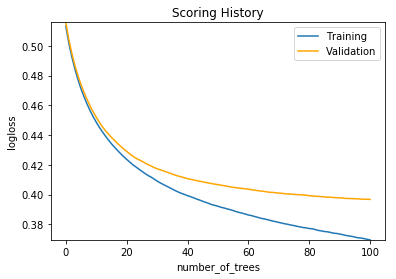

In [20]:
# Task 11: Plot the scoring history to make sure you're not overfitting
# Hint: Use plot function on the model object
%matplotlib inline
gbm_model.plot()

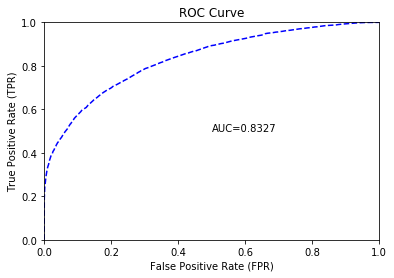

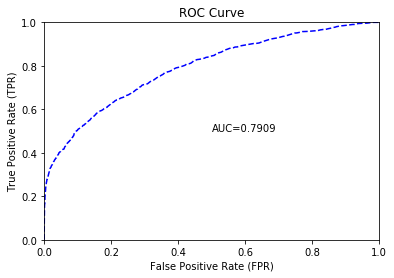

Training AUC = 0.8327282908704382
Validation AUC = 0.7908608197828122


In [22]:
# Task 12: Plot the ROC curve for the binomial models and get auc using h2o.auc
# Hint: Use h2o.performance and plot to grab the modelmetrics and then plotting the modelmetrics

gbm_model.model_performance(train = True).plot()
gbm_model.model_performance(valid = True).plot()

print("Training AUC = " + str(gbm_model.auc(train = True)))
print("Validation AUC = " + str(gbm_model.auc(valid = True)))

In [23]:
# Task 13: Check the variable importance and generate confusion matrix for max F1 threshold
# Hint: Use h2o.varimp for non-GLM model and use h2o.confusionMatrix

print (gbm_model.varimp(use_pandas = True))
print (gbm_model.confusion_matrix(valid = True))

               variable  relative_importance  scaled_importance  percentage
0        inq_last_6mths          8042.936523           1.000000    0.479369
1            addr_state          1725.761963           0.214569    0.102857
2                  term          1426.360474           0.177343    0.085013
3            revol_util          1235.873657           0.153660    0.073660
4         credit_length          1105.265381           0.137421    0.065875
5             revol_bal           881.640991           0.109617    0.052547
6               purpose           696.035278           0.086540    0.041485
7            annual_inc           509.852203           0.063391    0.030388
8             loan_amnt           233.616592           0.029046    0.013924
9                   dti           206.174423           0.025634    0.012288
10          delinq_2yrs           188.364563           0.023420    0.011227
11              pub_rec           138.114594           0.017172    0.008232
12          

,0,1,Error,Rate
0,5516.0,628.0,0.1022,(628.0/6144.0)
1,808.0,839.0,0.4906,(808.0/1647.0)
Total,6324.0,1467.0,0.1843,(1436.0/7791.0)


In [25]:
# Task 14: Score the entire data set using the model
# Hint: Use h2o.predict.
pred = gbm_model.predict(loan_stats)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [26]:
# Extra: Calculate the money gain/loss if model is implemented
# Calculate the total amount of money earned or lost per loan
loan_stats["earned"] = loan_stats["total_pymnt"] - loan_stats["loan_amnt"]

In [27]:
# Calculate how much money will be lost to false negative, vs how much will be saved due to true positives
loan_stats["pred"] = pred["predict"]

grouped = loan_stats.group_by(["bad_loan", "pred"])
net = grouped.sum(col = "earned", na = "ignore").get_frame()

n1 = net[(net["bad_loan"] == "0") & (net["pred"] == "0")]["sum_earned"].round(digits = 0).max()
n2 = net[(net["bad_loan"] == "0") & (net["pred"] == "1")]["sum_earned"].round(digits = 0).max()
n3 = net[(net["bad_loan"] == "1") & (net["pred"] == "1")]["sum_earned"].round(digits = 0).max()
n4 = net[(net["bad_loan"] == "1") & (net["pred"] == "0")]["sum_earned"].round(digits = 0).max()

# Calculate the amount earned
print ("Total amount of profit still earned using the model : %s" % '${:0,.0f}'.format(n1))
print ("Total amount of profit forfeitted using the model : %s" % '${:0,.0f}'.format(n2))
print ("Total amount of loss that could have been prevented : %s" % '${:0,.0f}'.format(n3))
print ("Total amount of loss that still would've accrued : %s" % '${:0,.0f}'.format(n4))

# Calculate Net
print ("Total profit by implementing model : $ %s" %'${:0,.0f}'.format((n1 - n2 + (-1*n3) - (-1*n4))))

Total amount of profit still earned using the model : $42,034,780
Total amount of profit forfeitted using the model : $8,240,871
Total amount of loss that could have been prevented : $-15,345,986
Total amount of loss that still would've accrued : $-16,066,068
Total profit by implementing model : $ $33,073,827


In [28]:
# Shutdown h2o instance
h2o.cluster().shutdown()

H2O session _sid_b6f0 closed.
